# 資料讀取

In [11]:
import os
import cv2
import numpy as np

IMG_SIZE = (128, 128)
DATASET_DIR = "dataset"

X = []
y = []

for label in range(10):
    folder = os.path.join(DATASET_DIR, str(label))
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)

        # 讀取灰階
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # 正規化
        img = img / 255.0

        # 攤平成向量
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print("資料維度:", X.shape)
print("標籤數量:", y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("訓練筆數:", X_train.shape[0])
print("測試筆數:", X_test.shape[0])


資料維度: (1001, 16384)
標籤數量: (1001,)
訓練筆數: 800
測試筆數: 201


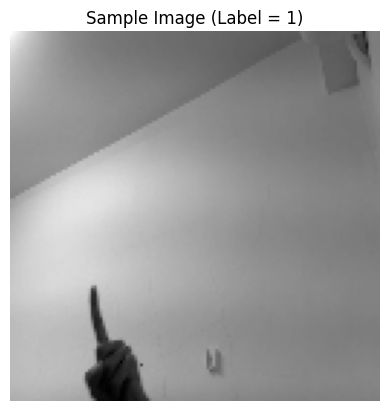

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 假設 X 已經存在（shape: [N, 784]）
# 顯示第一張圖片
img = X[120].reshape(128, 128)

plt.figure()
plt.imshow(img, cmap="gray")
plt.title("Sample Image (Label = {})".format(y[120]))
plt.axis("off")
plt.show()


# 模型訓練測試

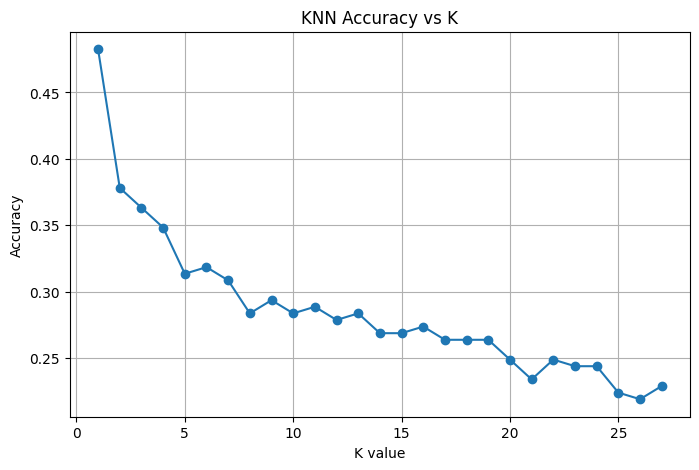

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import matplotlib.pyplot as plt

acc_history = []
k_values = []

for k in range(1, int((len(X_train))**0.5)):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    acc_history.append(acc)
    k_values.append(k)

plt.figure(figsize=(8, 5))
plt.plot(k_values, acc_history, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()


# 選擇最佳參數作為模型參數

In [14]:
knn = KNeighborsClassifier(
        n_neighbors=1,      # K 值
        metric='euclidean'  # 距離
    )

knn.fit(X_train, y_train)
print("✅ KNN 訓練完成")

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("🎯 測試準確率:", acc)

print("\n分類報告:")
print(classification_report(y_test, y_pred))

print("\n混淆矩陣:")
print(confusion_matrix(y_test, y_pred))


✅ KNN 訓練完成
🎯 測試準確率: 0.48258706467661694

分類報告:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.21      0.20      0.21        20
           2       0.26      0.25      0.26        20
           3       0.24      0.25      0.24        20
           4       0.50      0.43      0.46        21
           5       0.69      0.55      0.61        20
           6       0.76      0.80      0.78        20
           7       0.57      0.65      0.60        20
           8       0.57      0.85      0.68        20
           9       0.36      0.25      0.29        20

    accuracy                           0.48       201
   macro avg       0.48      0.48      0.47       201
weighted avg       0.48      0.48      0.47       201


混淆矩陣:
[[12  0  2  3  0  0  0  3  0  0]
 [ 0  4  4  5  5  1  0  0  1  0]
 [ 0  8  5  3  2  0  0  0  2  0]
 [ 2  3  3  5  2  0  0  0  3  2]
 [ 1  1  4  3  9  0  0  1  1  1]
 [ 0  1  0  0  0 11  0

# 模型儲存

In [15]:
import joblib

joblib.dump(knn, "knn_digit_model.pkl")

print("✅ KNN 模型已儲存")

✅ KNN 模型已儲存


# 圖片測試

🎯 預測結果: 3


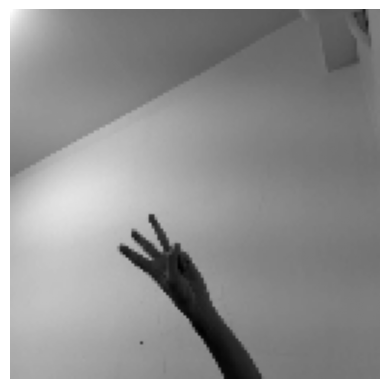

In [25]:
import cv2
import numpy as np

knn = joblib.load("knn_digit_model.pkl")

img = cv2.imread(r"C:\Users\ab881\AI_image_YOLO\dataset\3\3_001.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img = img / 255.0

X_input = img.flatten().reshape(1, -1)
pred = knn.predict(X_input)

print("🎯 預測結果:", pred[0])

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()